## HOMEWORK V

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('seaborn')


# Display numpy array in more compact form without scientific notation so this
#  [1.920e+03,  1.000e+00,  1.000e+00, ...,  3.500e+00,  5.000e-01, 7.000e-01], become this
# [1920.,       1.,        1., ...,          3.5,        0.5,       0.7]
np.set_printoptions(precision=3, suppress=True) 

# Display full output in Jupyter, not only last result
# https://ipython.readthedocs.io/en/stable/config/options/terminal.html
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all" # "last_expr_or_assign"

A datataset `clementinum.csv` contains data for average, maximum, minumum  of temperature and precipitation for a given date.

|year|month|day|avg|max|min|prec
|----|-----|---|---|---|---|---|
|1|1920|1|1|1.5|3.5|0.5|0.7
|2|1920|1|2|0.9|1.6| 0.5|2.2
|3|1920|1|3|-4.1|0.5|-6.5|0
|4|1920|1|4|-1.8|-0.8|-6.3|1.8
|5|1920|1|5|-1.9|-0.3|-2.9|0

### Load the meteorological CSV data as `numpy.array`.

In [2]:
meteo = np.loadtxt(fname="clementinum.csv", skiprows=1, delimiter=",")

print(f"There is an {meteo.shape[0]} rows and {meteo.shape[1]} columns in dataset.")

There is an 36525 rows and 7 columns in dataset.


### Extract an array of dates from columns with index 0 (year), 1 (month), 2 (day).

In [3]:
dates = np.array([dt.date(year, month, day) for year, month, day in meteo[:, :3].astype(int)])

### Extract temperature and precipitation data

In [4]:
t_avg, t_max, t_min, prec = meteo[:, 3:].T # select columns and then transpose to rows

## Problem 1 -- Simple Moving Average (SMA)

In statistics, a **simple moving average (SMA)** (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. Here is a simple figure to illustrate, how the moving average is calculated.

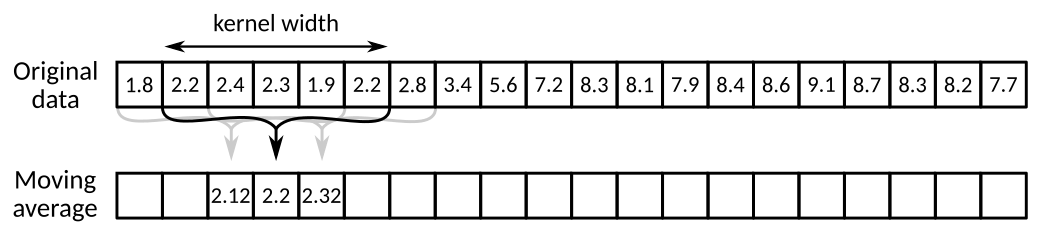

Your first task is to create small code snippet, which will produce numpy array `ma` containing moving average of Prague daily temperatures `t_avg` for **kernel width 1 week**, i.e. 7 days. <br> Resulting array `ma` should contain moving averages starting from 1st January 2000 until 31st December 2004. For proper selection of data, you should use `dates` array to create boolean index.

## Solution

In [5]:
def SMA(array: np.array, n: int = 3) -> np.array:
    """
    The simple moving average calculated with convolution.
    """
    return np.convolve(np.ones(n) / n, array, mode="same")

# Create a mask for the given date range. 
mask = (dates >= dt.date(year=2000, month=1, day=1)) \
     & (dates <= dt.date(year=2004, month=12, day=31))

# Calculate the 7-day moving average for all data.
t_sma7 = SMA(t_avg, 7)

Plot the average and 7-day moving average temperatures for the given date range. 

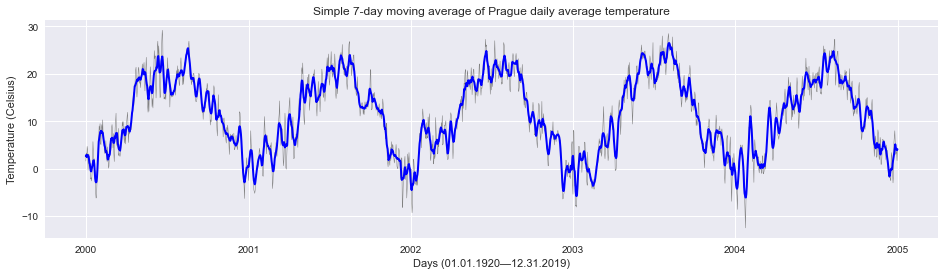

In [6]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.set_xlabel(f'Days ({min(dates):%m.%d.%Y}—{max(dates):%m.%d.%Y})')
ax.set_ylabel('Temperature (Celsius)')
ax.set_title('Simple 7-day moving average of Prague daily average temperature')

# Plot only data for the date-range: use the mask.
ax.plot(dates[mask], t_avg[mask], color='gray', lw=0.5)
ax.plot(dates[mask], t_sma7[mask], color='blue', lw=2.0)

## Problem 2 -- Extreme days

- Calculate `t_sma11_max` and `t_sma11_min` arrays of 11-day moving average for the same date range.

- Explore on what days, the weekly moving average `t_sma7` was either greater than 11-days moving maximum, or smaller than 11-days moving minimum. 

Answer the following questions:
 - How many extreme days was in selected date range?
 - In which months the extreme days most commonly occurs?

Plot calculated values:
 - filled area bounded by 11-days moving minimum and maximum. *Use `color="green"` and transparency `alpha=0.5`*
 - line of weekly moving average. *Use `color="RoyalBlue"` and line width `lw=2`*
 - red stars on weekly moving average line for extreme days. *Use red star marker `r*` and marker size 10*
 
## Solution

In [7]:
# Calculate the 11-day moving average for all data.
t_sma11_max = SMA(t_max, 11)
t_sma11_min = SMA(t_min, 11)

# Find the extreme days.
extremes = (
    (t_sma7[mask] > t_sma11_max[mask]) 
  | (t_sma7[mask] < t_sma11_min[mask])
)

extreme_dates = dates[mask][extremes]
extreme_temps = t_sma7[mask][extremes]

import collections
print(f"Number of extreme days is {len(extreme_dates)}.")
print(f"Extreme days mostly occurs in month {max(collections.Counter([date.month for date in extreme_dates]))}.")


Number of extreme days is 9.
Extreme days mostly occurs in month 12.


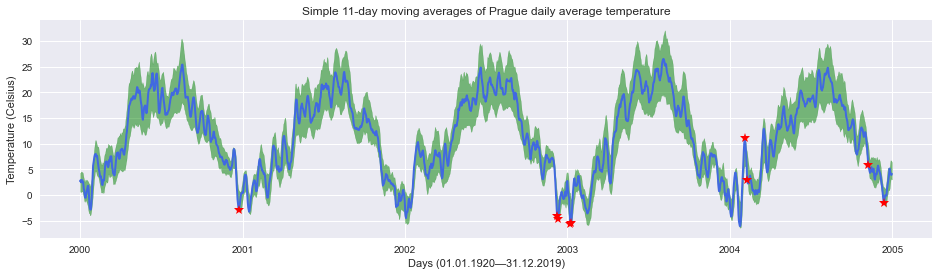

In [8]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.set_xlabel(f'Days ({min(dates):%d.%m.%Y}—{max(dates):%d.%m.%Y})')
ax.set_ylabel('Temperature (Celsius)')
ax.set_title('Simple 11-day moving averages of Prague daily average temperature')

ax.plot(dates[mask], t_sma7[mask], color='RoyalBlue', lw=2)
ax.fill_between(dates[mask], t_sma11_min[mask], t_sma11_max[mask], color="green", alpha=0.5)
ax.plot(extreme_dates, extreme_temps, 'r*', markersize=10)

## Problem 3 -- Most common daily temperature variation

Your last task is to calculate daily temperature variation `t_var`, defined as difference betwen daily maximum `t_max` and daily minimum `t_min`. Plot histogram of those values and find out which value is most common.

For plotting histogram, try to change number of bins and select best value, so resulting histogram will balance visual appearance and will be still informative about how data are distributed.

Answer following questions:
 - Are the daily variations normaly distributed? __NO__
 - On what date the daily temperature variation was minimal? ***
 - On what date the daily temperature variation was maximal? ***
 
## Solution

*** The variation minimum was on 2008-12-16 with value 0.39999999999999947.
*** The variation maximum was on 1978-12-31 with value 21.2.
*** Most common are values near 5.


(array([0.026, 0.096, 0.111, 0.088, 0.063, 0.052, 0.033, 0.01 , 0.001,
        0.   ]),
 array([ 0.4 ,  2.48,  4.56,  6.64,  8.72, 10.8 , 12.88, 14.96, 17.04,
        19.12, 21.2 ]))

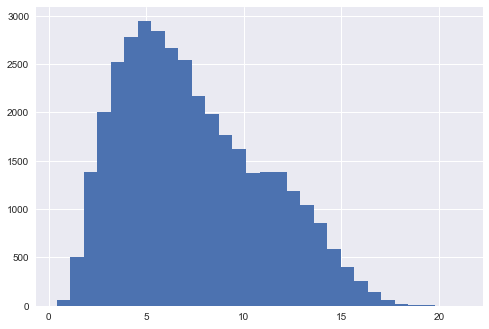

In [9]:
t_var = t_max - t_min

plt.hist(t_var, bins=30)

var_max_idx  = np.where(t_var == np.amax(t_var))
var_min_idx  = np.where(t_var == np.amin(t_var))

print(f"*** The variation minimum was on {dates[var_min_idx][0]} with value {np.amin(t_var)}."), 
print(f"*** The variation maximum was on {dates[var_max_idx][0]} with value {np.amax(t_var)}.")
print(f"*** Most common are values near 5.")

np.histogram(t_var, density=True)